<a href="https://colab.research.google.com/github/JulienArmand1/RAG-stat/blob/main/Preuves_google_colab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling (TS)

Dans cette étude, les récompenses sont affectées d’un bruit sous-gaussien d’écart-type $\sigma$,  
et Thompson Sampling utilise comme distribution a priori  
$$
N(\mu_{0},\,\sigma_{0}^{2}).
$$

À chaque pas de temps, un agent TS choisit l’action $i_{t}$ en se basant sur des tirages  
$$
\theta_{i,t} \sim N\bigl(m_{i,t},\,s_{i,t}^{2}\bigr),
\quad i = 1,\dots,k,
$$  
où  
$$
m_{i,t}
= \frac{\displaystyle\frac{\mu_{0}}{\sigma_{0}^{2}}
         + \displaystyle\frac{S_{i}(t-1)}{\sigma^{2}}}
       {\displaystyle\frac{1}{\sigma_{0}^{2}}
         + \displaystyle\frac{N_{i}(t-1)}{\sigma^{2}}},
\qquad
s_{i,t}^{2}
= \Bigl(\tfrac{1}{\sigma_{0}^{2}} + \tfrac{N_{i}(t-1)}{\sigma^{2}}\Bigr)^{-1}.
$$

Enfin, l’action choisie est  
$$
i_{t} \;=\; \arg\max_{i\in\{1,\dots,k\}} \theta_{i,t}.
$$


# Simple Game


\begin{array}{c|cc}
 & \textbf{Action B (colonne)} & \textbf{Action A (colonne)} \\[0.5ex]
\hline
\textbf{Action A (ligne)} & 1 & 0 \\[1ex]
\textbf{Action B (ligne)} & 0 & 1 - \Delta
\end{array}



où :
- chaque joueur (ou l’agent) choisit soit \(A\), soit \(B\),  
- les gains sont ceux de la case correspondante,  
- ($1>\Delta > 0$) est le **gap de sous-optimalité** (la perte si les deux jouent \(B, B) au lieu de (A, A)).  


Je pose les "états" possibles de notre système à deux agents  $(a,b,c,d)$ :
$$
\text{Pour tout }t\in\mathbb{N},\quad
\begin{aligned}
a &= N_{(A,A)}(t-1),\\
b &= N_{(A,B)}(t-1),\\
c &= N_{(B,A)}(t-1),\\
d &= N_{(B,B)}(t-1).
\end{aligned}
$$

## Initialisation des variables importantes pour le cas sans bruit ($\sigma = 0 $)

$\sigma_{0}=1/2$, car la variabilité causée par l'adversaire peut se représenté par une loi 1/2-$\sigma$ sous-gausienne. <br>
$\mu_{0} = 1$, par hypothèse<br>
$\sigma_{0}^{2} = 1$, par hypothèse <br>
On peut alors remplacer ces valeurs dans les expressions de $m_{i,t}$ et $s_{i,t}^{2}$ pour obtenir :

$$
m_{i,t}
= \frac{\displaystyle\frac{(1)}{(1)}
         + \displaystyle\frac{S_{i}(t-1)}{(1/2)^{2}}}
       {\displaystyle\frac{1}{(1)}
         + \displaystyle\frac{N_{i}(t-1)}{(1/2)^{2}}},
\qquad
s_{i,t}^{2}
= \Bigl(\tfrac{1}{(1)} + \tfrac{N_{i}(t-1)}{(1/2)^{2}}\Bigr)^{-1}.
$$

\begin{align*}
m_{i,t} &= \frac{1 + 4\,S_{i}(t-1)}{1 + 4\,N_{i}(t-1)}, \qquad
s_{i,t}^{2} = \frac{1}{1 + 4\,N_{i}(t-1)}.
\end{align*}

Je pose les "états" possibles de notre système à deux agents  $(a,b,c,d)$ :
$$
\text{Pour tout }t\in\mathbb{N},\quad
\begin{aligned}
a &= N_{(A,A)}(t-1),\\
b &= N_{(A,B)}(t-1),\\
c &= N_{(B,A)}(t-1),\\
d &= N_{(B,B)}(t-1).
\end{aligned}
$$

Je peux alors réécrire les expressions de $m_{i,t}$ et $s_{i,t}^{2}$  généralisée pour chacun des agent $p \in  {1,2}$ ($m_{i,p,t}$ et $s_{i,p,t}^{2}$):
\begin{align*}
m_{A,1,t} &= \frac{1 + 4\,a}{1 + 4\,(a+b)}, \qquad
s_{A,1,t}^{2} = \frac{1}{1 + 4\,(a+b)},\\[1ex]
m_{B,1,t} &= \frac{1 + 4\,d\,(1-\Delta)}{1 + 4\,(c+d)}, \qquad
s_{B,1,t}^{2} = \frac{1}{1 + 4\,(c+d)},\\[1ex]
m_{A,2,t} &= \frac{1 + 4\,a}{1 + 4\,(a+c)}, \qquad
s_{A,2,t}^{2} = \frac{1}{1 + 4\,(a+c)},\\[1ex]
m_{B,2,t} &= \frac{1 + 4\,d\,(1-\Delta)}{1 + 4\,(b+d)}, \qquad
s_{B,2,t}^{2} = \frac{1}{1 + 4\,(b+d)}.\\[1ex]
\end{align*}

## Calculs pour le cas sans bruit ($\sigma = 0 $)

1. Pour commencer, on peut vérifier les conditions sur les états possibles $(a,b,c,d)$ qui entraine $m_{A,1,t} < m_{B,1,t}$ et $m_{A,2,t} < m_{B,2,t}$



$$
\begin{aligned}
\frac{1 + 4a}{1 + 4(a+b)}
&< \frac{1 + 4d\,(1-\Delta)}{1 + 4(c+d)},
\\[1ex]
\end{aligned}
$$

$$
\begin{aligned}
\frac{1 + 4a}{1 + 4(a+c)}
&< \frac{1 + 4d\,(1-\Delta)}{1 + 4(b+d)}
\\[1ex]
\end{aligned}
$$







$$
\begin{aligned}
f1(a)
&= \frac{1 + 4d\,(1-\Delta)}{1 + 4(c+d)}-\frac{1 + 4a}{1 + 4(a+b)}
\\[1ex]
f2(a)
&= \frac{1 + 4d\,(1-\Delta)}{1 + 4(b+d)}-\frac{1 + 4a}{1 + 4(a+c)}
\\[1ex]
\end{aligned}
$$



Les états qui respectent ces conditions doivent respecter $f1(a)>0$ et $f2(a)>0$



En posant $a=a, b=\alpha_{1}\,a,c=\alpha_{2}\,a, d=\alpha_{3}\,a$, on obtient :
$$
\begin{aligned}
f1(a)
&= \frac{1 + 4\,\alpha_{3}\,a\,(1-\Delta)}{1 + 4\,a\,(\alpha_{2}+\alpha_{3})}-\frac{1 + 4a}{1 + 4\,a(1+\alpha_{1})}
\\[1ex]
f2(a)
&= \frac{1 + 4\,\alpha_{3}\,a\,(1-\Delta)}{1 + 4\,a\,(\alpha_{1}+\alpha_{3})}-\frac{1 + 4a}{1 + 4\,a(1+\alpha_{2})}
\\[1ex]
\end{aligned}
$$


\begin{aligned}
f_1(a) &=
\frac{
  16\bigl[\alpha_{1}\,\alpha_{3}(1-\Delta)\;-\;\alpha_{2}\;-\;\Delta\,\alpha_{3}\bigr]\,a^2
  \;+\;4\bigl[\alpha_{1}-\alpha_{2}-\Delta\,\alpha_{3}\bigr]\,a
}{
  16\bigl[\alpha_{1}\,\alpha_{2}+\alpha_{1}\,\alpha_{3}+\alpha_{2}+\alpha_{3}\bigr]\,a^2
  \;+\;4\bigl[\alpha_{1}+\alpha_{2}+\alpha_{3}+1\bigr]\,a
  \;+\;1
},\\[1ex]
f_2(a) &=
\frac{
  16\bigl[\alpha_{2}\,\alpha_{3}(1-\Delta)\;-\;\alpha_{1}\;-\;\Delta\,\alpha_{3}\bigr]\,a^2
  \;+\;4\bigl[\alpha_{2}-\alpha_{1}-\Delta\,\alpha_{3}\bigr]\,a
}{
  16\bigl[\alpha_{1}\,\alpha_{2}+\alpha_{1}+\alpha_{2}\,\alpha_{3}+\alpha_{3}\bigr]\,a^2
  \;+\;4\bigl[\alpha_{1}+\alpha_{2}+\alpha_{3}+1\bigr]\,a
  \;+\;1
}.
\end{aligned}



les dénominateurs sont positifs, le signe des deux fonctions dépendent des numérateurs seulement. Les numérateurs ont une forme quadratique.

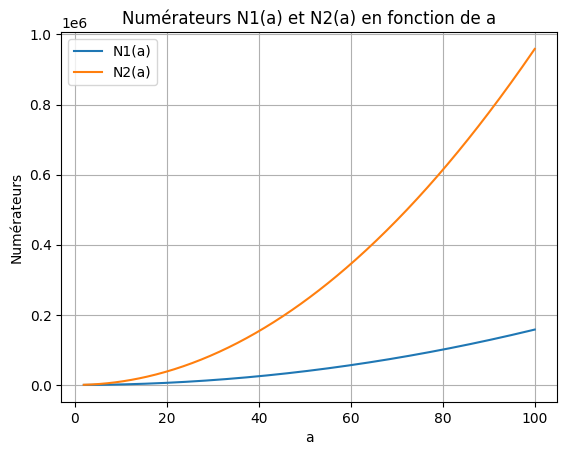

In [ ]:
# Voici une première recherche pour trouver les valeurs alpha possibles

import numpy as np
import matplotlib.pyplot as plt

alpha1 = 2
alpha2 = 3
alpha3 = 8
Delta = 0.5



def N1(a):
    return (16*(alpha1*alpha3*(1-Delta) - alpha2 - Delta*alpha3)*a**2
            + 4*(alpha1 - alpha2 - Delta*alpha3)*a)

def N2(a):
    return (16*(alpha2*alpha3*(1-Delta) - alpha1 - Delta*alpha3)*a**2
            + 4*(alpha2 - alpha1 - Delta*alpha3)*a)

# Intervalle de a
a_values = np.linspace(2, 100, 400)

# Tracé des deux numérateurs sur la même figure
plt.figure()
plt.plot(a_values, N1(a_values), label='N1(a)')
plt.plot(a_values, N2(a_values), label='N2(a)')
plt.xlabel('a')
plt.ylabel('Numérateurs')
plt.title('Numérateurs N1(a) et N2(a) en fonction de a')
plt.legend()
plt.grid(True)
plt.show()

Ensuite, étant donné que le numérateur est un polynôme du second degré, on peut se concentrer sur son terme dominant et en déduire (en fixant la relation entre a et d avec le paramètre $\alpha_{3}$ des relations entre $\alpha_{1}$ et $\alpha_{2}$):

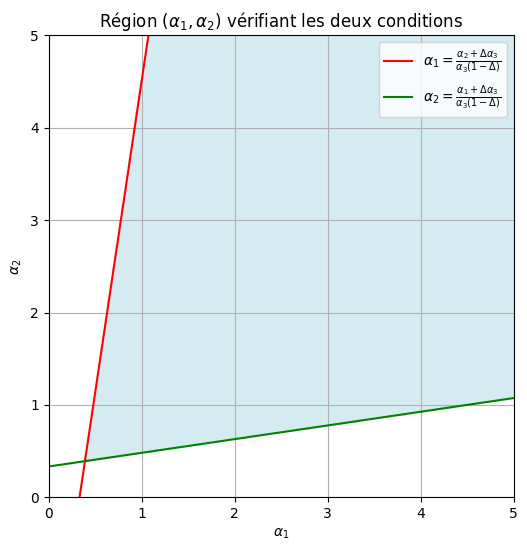

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres pour l'illustration
Delta = 0.25
alpha3 = 9

# Définition des conditions
def cond1(a1, a2):
    return a1 > (a2 + Delta * alpha3) / (alpha3 * (1 - Delta))

def cond2(a1, a2):
    return a2 > (a1 + Delta * alpha3) / (alpha3 * (1 - Delta))

# Grille de valeurs pour alpha1 et alpha2
a1_vals = np.linspace(0, 10, 400)
a2_vals = np.linspace(0, 10, 400)
A1, A2 = np.meshgrid(a1_vals, a2_vals)

# Calcul du masque de la région
mask = cond1(A1, A2) & cond2(A1, A2)

# Tracé
plt.figure(figsize=(6, 6))
plt.contourf(A1, A2, mask, levels=[-0.5, 0.5, 1.5], colors=['white', 'lightblue'], alpha=0.5)

# Lignes frontières
plt.plot((a2_vals + Delta * alpha3) / (alpha3 * (1 - Delta)), a2_vals, 'r-', label=r'$\alpha_1=\frac{\alpha_2+\Delta\alpha_3}{\alpha_3(1-\Delta)}$')
plt.plot(a1_vals, (a1_vals + Delta * alpha3) / (alpha3 * (1 - Delta)), 'g-', label=r'$\alpha_2=\frac{\alpha_1+\Delta\alpha_3}{\alpha_3(1-\Delta)}$')

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel(r'$\alpha_1$')
plt.ylabel(r'$\alpha_2$')
plt.title(r'Région $(\alpha_1,\alpha_2)$ vérifiant les deux conditions')
plt.legend()
plt.grid(True)
plt.show()


En résumé, on doit avoir $\alpha_{1}>\frac{\alpha_{2}+Δ\,\alpha{3}}{\alpha{3}\,(1-Δ)}$ et $\alpha_{2}>\frac{\alpha_{1}+Δ\,\alpha{3}}{\alpha{3}\,(1-Δ)}$ et $\alpha_{3}>\frac{1}{1-Δ}$.

Voici un mini-code illustrant comment les probabilités de sélection de chaque action influencent les valeurs des paramètres alpha :

In [ ]:
# p1, p2: Probabilités de jouer B
p1=0.90
p2=0.90

P = np.array([[p1*p2,(1-p1)*p2],[(1-p2)*p1,(1-p1)*(1-p2)]])
print(P)
P2 = P/P[1,1]
print(P2)

[[0.81 0.09]
 [0.09 0.01]]
[[81.  9.]
 [ 9.  1.]]


## Autres codes :

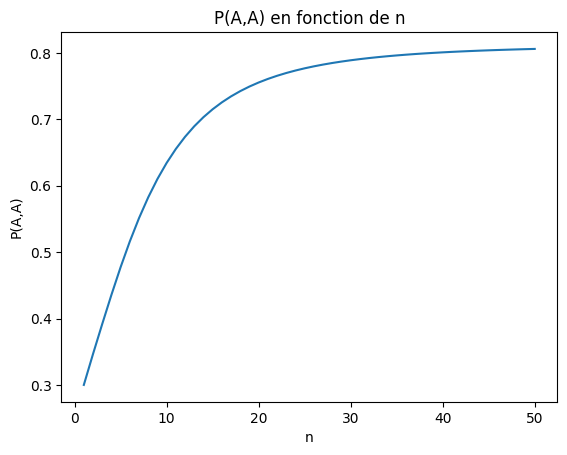

In [ ]:
import numpy as np
import pandas as pd
import math
from scipy.stats import norm
import matplotlib.pyplot as plt

def compute_p1_p2(state):
    a, b, c, d = state
    mu1 = (1 + 4*a) / (1 + 4*(a+b)) - (1 + 2*d) / (1 + 4*(c+d))
    var1 = 1 / (1 + 4*(a+b)) + 1 / (1 + 4*(c+d))
    p1 = 1 - norm.cdf(0, loc=mu1, scale=math.sqrt(var1))

    mu2 = (1 + 4*a) / (1 + 4*(a+c)) - (1 + 2*d) / (1 + 4*(b+d))
    var2 = 1 / (1 + 4*(a+c)) + 1 / (1 + 4*(b+d))
    p2 = 1 - norm.cdf(0, loc=mu2, scale=math.sqrt(var2))

    return p1, p2

def weighted_mean_PAA(n_max):
    pr = {(0,1,1,0): 1.0}
    weighted_means = []

    for n in range(1, n_max+1):
        new_pr = {}
        for state, prob in pr.items():
            p1, p2 = compute_p1_p2(state)
            for inc_state, trans in [
                ((state[0]+1, state[1], state[2], state[3]), p1 * p2),
                ((state[0], state[1]+1, state[2], state[3]), p1 * (1-p2)),
                ((state[0], state[1], state[2]+1, state[3]), (1-p1) * p2),
                ((state[0], state[1], state[2], state[3]+1), (1-p1) * (1-p2))
            ]:
                new_pr[inc_state] = new_pr.get(inc_state, 0) + prob * trans

        mean_paa = sum(prob * np.prod(compute_p1_p2(state)) for state, prob in new_pr.items())
        weighted_means.append((n, mean_paa))
        pr = new_pr

    return pd.DataFrame(weighted_means, columns=['n', 'P(A,A)'])


df_weighted = weighted_mean_PAA(50)

plt.figure()
plt.plot(df_weighted['n'], df_weighted['P(A,A)'])
plt.xlabel('n')
plt.ylabel('P(A,A)')
plt.title('P(A,A) en fonction de n')
plt.show()

Le code suivant permet de vérfier les probabilités de certains états :

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm

max_n = 50

records = []
for n in range(2, max_n):
    for a in range(0, n):
        for b in range(0, n - a + 1):
            for c in range(0, n - a - b + 1):
                d = n - a - b - c
                if (a + b)*(c + d) *(a + c) * (b + d) == 0:
                    continue
                records.append((a, b, c, d, n))

arr = np.array(records, dtype=int)
a = arr[:, 0]
b = arr[:, 1]
c = arr[:, 2]
d = arr[:, 3]
n = arr[:, 4]

mu1     = (1 + 4*a) / (1 + 4*(a + b)) - (1 + 2*d) / (1 + 4*(c + d))
var1    = 1 / (1 + 4*(a + b))        + 1 / (1 + 4*(c + d))
mu2     = (1 + 4*a) / (1 + 4*(a + c)) - (1 + 2*d) / (1 + 4*(b + d))
var2    = 1 / (1 + 4*(a + c))        + 1 / (1 + 4*(b + d))

p1      = 1 - norm.cdf(0, loc=mu1, scale=np.sqrt(var1))
p2      = 1 - norm.cdf(0, loc=mu2, scale=np.sqrt(var2))

P_AA    = p1 * p2
P_AB    = p1 * (1 - p2)
P_BA    = (1 - p1) * p2
P_BB    = (1 - p1) * (1 - p2)

mu1_a1 = (1 + 4*(a+1)) / (1 + 4*((a+1) + b)) - (1 + 2*d) / (1 + 4*(c + d))
var1_a1 = 1 / (1 + 4*((a+1) + b)) + 1 / (1 + 4*(c + d))
mu2_a1 = (1 + 4*(a+1)) / (1 + 4*((a+1) + c)) - (1 + 2*d) / (1 + 4*(b + d))
var2_a1 = 1 / (1 + 4*((a+1) + c)) + 1 / (1 + 4*(b + d))

p1_a1 = 1 - norm.cdf(0, loc=mu1_a1, scale=np.sqrt(var1_a1))
p2_a1 = 1 - norm.cdf(0, loc=mu2_a1, scale=np.sqrt(var2_a1))
P_AA_a1 = p1_a1 * p2_a1
P_AB_a1 = p1_a1 * (1 - p2_a1)
P_BA_a1 = (1 - p1_a1) * p2_a1
P_BB_a1 = (1 - p1_a1) * (1 - p2_a1)

mu1_b1 = (1 + 4*a) / (1 + 4*(a + (b+1))) - (1 + 2*d) / (1 + 4*(c + d))
var1_b1 = 1 / (1 + 4*(a + (b+1))) + 1 / (1 + 4*(c + d))
mu2_b1 = (1 + 4*a) / (1 + 4*(a + c)) - (1 + 2*d) / (1 + 4*((b+1) + d))
var2_b1 = 1 / (1 + 4*(a + c)) + 1 / (1 + 4*((b+1) + d))

p1_b1 = 1 - norm.cdf(0, loc=mu1_b1, scale=np.sqrt(var1_b1))
p2_b1 = 1 - norm.cdf(0, loc=mu2_b1, scale=np.sqrt(var2_b1))
P_AA_b1 = p1_b1 * p2_b1
P_AB_b1 = p1_b1 * (1 - p2_b1)
P_BA_b1 = (1 - p1_b1) * p2_b1
P_BB_b1 = (1 - p1_b1) * (1 - p2_b1)

mu1_c1 = (1 + 4*a) / (1 + 4*(a + b)) - (1 + 2*d) / (1 + 4*((c+1) + d))
var1_c1 = 1 / (1 + 4*(a + b)) + 1 / (1 + 4*((c+1) + d))
mu2_c1 = (1 + 4*a) / (1 + 4*((a + (c+1)))) - (1 + 2*d) / (1 + 4*(b + d))
var2_c1 = 1 / (1 + 4*((a + (c+1)))) + 1 / (1 + 4*(b + d))

p1_c1 = 1 - norm.cdf(0, loc=mu1_c1, scale=np.sqrt(var1_c1))
p2_c1 = 1 - norm.cdf(0, loc=mu2_c1, scale=np.sqrt(var2_c1))
P_AA_c1 = p1_c1 * p2_c1
P_AB_c1 = p1_c1 * (1 - p2_c1)
P_BA_c1 = (1 - p1_c1) * p2_c1
P_BB_c1 = (1 - p1_c1) * (1 - p2_c1)

mu1_d1 = (1 + 4*a) / (1 + 4*(a + b)) - (1 + 2*(d+1)) / (1 + 4*(c + (d+1)))
var1_d1 = 1 / (1 + 4*(a + b)) + 1 / (1 + 4*(c + (d+1)))
mu2_d1 = (1 + 4*a) / (1 + 4*(a + c)) - (1 + 2*(d+1)) / (1 + 4*(b + (d+1)))
var2_d1 = 1 / (1 + 4*(a + c)) + 1 / (1 + 4*(b + (d+1)))

p1_d1 = 1 - norm.cdf(0, loc=mu1_d1, scale=np.sqrt(var1_d1))
p2_d1 = 1 - norm.cdf(0, loc=mu2_d1, scale=np.sqrt(var2_d1))
P_AA_d1 = p1_d1 * p2_d1
P_AB_d1 = p1_d1 * (1 - p2_d1)
P_BA_d1 = (1 - p1_d1) * p2_d1
P_BB_d1 = (1 - p1_d1) * (1 - p2_d1)

delta_P = P_AA*P_AA_a1 + P_AB*P_AA_b1  + P_BA*P_AA_c1  + P_BB*P_AA_d1  - P_AA


df = pd.DataFrame({
    'a': a, 'b': b, 'c': c, 'd': d, 'n': n,
    'P(A,A)':    P_AA,    'P(A,B)':    P_AB,    'P(B,A)':    P_BA,    'P(B,B)':    P_BB,
    'P(A,A)_a+1':P_AA_a1, 'P(A,B)_a+1':P_AB_a1, 'P(B,A)_a+1':P_BA_a1, 'P(B,B)_a+1':P_BB_a1,
    'P(A,A)_b+1':P_AA_b1, 'P(A,B)_b+1':P_AB_b1, 'P(B,A)_b+1':P_BA_b1, 'P(B,B)_b+1':P_BB_b1,
    'P(A,A)_c+1':P_AA_c1, 'P(A,B)_c+1':P_AB_c1, 'P(B,A)_c+1':P_BA_c1, 'P(B,B)_c+1':P_BB_c1,
    'P(A,A)_d+1':P_AA_d1, 'P(A,B)_d+1':P_AB_d1, 'P(B,A)_d+1':P_BA_d1, 'P(B,B)_d+1':P_BB_d1,
    'delta_P': delta_P
})

df

result = df[(df['a'] == 3) & (df['delta_P'] < 0)]
result2 = df[(df['n'] < 50) & (df['a'] < 4) & (df['d'] > 20)]
print(result2)

        a   b  c   d   n    P(A,A)    P(A,B)    P(B,A)    P(B,B)  P(A,A)_a+1  \
11956   1   0  0  21  22  0.737079  0.121454  0.121454  0.020013    0.847636   
13937   0   1  1  21  23  0.072321  0.196605  0.196605  0.534470    0.338724   
14190   1   0  0  22  23  0.737816  0.121146  0.121146  0.019892    0.848667   
14191   1   0  1  21  23  0.483804  0.385809  0.072540  0.057847    0.683121   
14212   1   1  0  21  23  0.483804  0.072540  0.385809  0.057847    0.683121   
...    ..  .. ..  ..  ..       ...       ...       ...       ...         ...   
270421  3  23  1  22  49  0.005606  0.000120  0.973443  0.020831    0.010017   
270422  3  23  2  21  49  0.008264  0.000450  0.940142  0.051145    0.014677   
270444  3  24  0  22  49  0.003408  0.000014  0.992415  0.004163    0.006095   
270445  3  24  1  21  49  0.005330  0.000102  0.975817  0.018750    0.009387   
270467  3  25  0  21  49  0.003231  0.000012  0.993034  0.003723    0.005695   

        ...  P(B,B)_b+1  P(A,A)_c+1  P(